## Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Exploratory Data Analysis   (EDA)

In [2]:
df = pd.read_csv("zomato.csv")   #Importing Dataset

In [54]:
df.head(1)            #viewing the first row of the data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


In [3]:
data = df.drop(['url', 'address', 'phone', 'dish_liked', 'reviews_list', 'menu_item', 'location', 'name'], axis=1)
# Dropping unnecessary columns from data

In [5]:
data = data.rename(columns={'approx_cost(for two people)': 'cost',
               'listed_in(type)': 'type',
               'listed_in(city)': 'city'})
#remainig the columns with new name

In [6]:
data.shape      #shape of the data (Rows x Columns)

(51717, 9)

In [7]:
data.dropna(how='any', inplace=True)    #dropping nul values from the data

In [14]:
data.isna().sum()                #checking for the null values

online_order    0
book_table      0
rate            0
votes           0
rest_type       0
cuisines        0
cost            0
type            0
city            0
dtype: int64

In [8]:
data = data.loc[data.rate != 'NEW'].reset_index(drop=True)
data = data.loc[data.rate != '-'].reset_index(drop=True)
#dropping the uniques from the data

In [9]:
data.rate = data.rate.str.replace('/5', '').astype(float)   #Replacing the /5 value to ""

In [10]:
data.cost = data.cost.str.replace(',', '').astype('int')    #Replacing the "," from the data to ""

In [12]:
data.duplicated().sum()  #checking for the duplicates 

95

In [13]:
data.drop_duplicates(inplace=True)    #dropping the duplicates

In [16]:
data.nunique()       #checking for the uniques

online_order       2
book_table         2
rate              31
votes           2323
rest_type         87
cuisines        2367
cost              63
type               7
city              30
dtype: int64

In [17]:
data['rate'].unique()      #checking uniques in the target variables

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [22]:
data['cost']  #displaying the data of cost columns

0         800
1         800
2         800
3         300
4         600
         ... 
41258     800
41259     800
41260    1500
41261    2500
41262    1500
Name: cost, Length: 41168, dtype: int32

In [23]:
data.head()     #displaying first five rows of dataset

,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city
0,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [24]:
data.info()         #info of the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41168 entries, 0 to 41262
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  41168 non-null  object 
 1   book_table    41168 non-null  object 
 2   rate          41168 non-null  float64
 3   votes         41168 non-null  int64  
 4   rest_type     41168 non-null  object 
 5   cuisines      41168 non-null  object 
 6   cost          41168 non-null  int32  
 7   type          41168 non-null  object 
 8   city          41168 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 3.0+ MB


In [25]:
data.describe()      #displaying the statistical info of the data

,rate,votes,cost
count,41168.000000,41168.000000,41168.000000
mean,3.701921,352.234940,603.726341
std,0.439933,883.663126,464.702498
min,1.800000,0.000000,40.000000
25%,3.400000,21.000000,300.000000
50%,3.700000,73.000000,500.000000
75%,4.000000,277.000000,750.000000
max,4.900000,16832.000000,6000.000000


In [26]:
data.to_csv('data.csv', index=False)       #converting the cleaned data to a new csv file

In [28]:
data.head()       #displaying first five rows of dataset

,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city
0,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


## Visualization the data

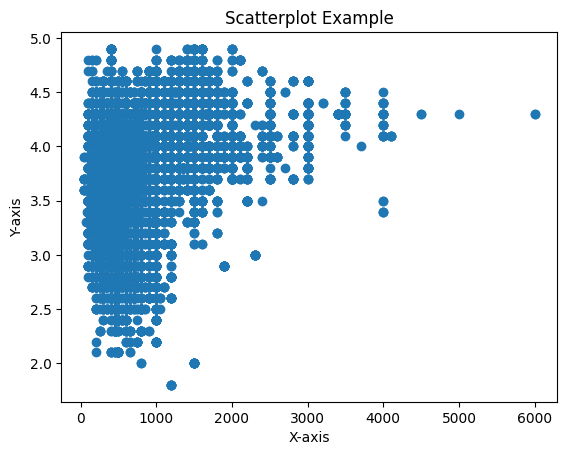

In [55]:
# Create a scatterplot
plt.scatter(data['cost'], data['rate'])

# Add axis labels and a title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatterplot Example')

# Show the plot
plt.show()

C:\Users\Home\AppData\Local\Temp\ipykernel_17132\4142025106.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


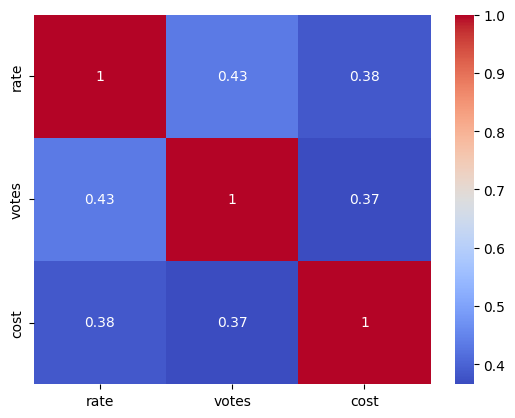

In [56]:
# Create a correlation matrix
corr_matrix = data.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

## Spliting the data

In [29]:
y = data['rate']
X = data.drop(['rate'], axis=1)    #taking X and Y variables for the data

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.80, random_state=1)
#Splitting the data and training and testing the data 

In [32]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['votes'], data['rate'])

# perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print('Chi-square statistic:', chi2)
print('p-value:', p)

Chi-square statistic: 298556.7471584177
p-value: 0.0


In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer

## Label Encoder

In [34]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)

## Column Transformer

In [35]:
tr1 = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse=False,dtype = np.int32, handle_unknown="ignore"),['online_order', 'book_table', 'rest_type', 'cuisines','type', 'city']),
], remainder='passthrough')

In [36]:
tr2 = ColumnTransformer(transformers=[
     ('tnf2',MinMaxScaler(),(2,5))
], remainder='passthrough')

In [37]:
tr3 = RandomForestRegressor()

## Pipeline Creation

In [38]:
pipe = make_pipeline(tr1, tr2, tr3)

In [39]:
pipe.fit(X_train, y_train)

D:\Anaconda\envs\ML\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(dtype=<class 'numpy.int32'>,
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['online_order', 'book_table',
                                                   'rest_type', 'cuisines',
                                                   'type', 'city'])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf2', MinMaxScaler(),
                                                  (2, 5))])),
                ('randomforestregressor', RandomForestRegressor())])

In [40]:
pipe.score(X_test, y_test)

0.9093915581376836

In [41]:
pipe.predict(X_test)

array([3.784, 3.755, 2.894, ..., 3.816, 2.413, 3.223])

## Reviewing the Prediction

In [44]:
new_test = X_test.head()
new_test

,online_order,book_table,votes,rest_type,cuisines,cost,type,city
14316,No,Yes,289,Casual Dining,North Indian,600,Delivery,Indiranagar
20201,Yes,No,209,Casual Dining,"Kerala, Seafood, South Indian, North Indian, C...",600,Delivery,Kammanahalli
36705,No,No,119,Casual Dining,"North Indian, South Indian, Chinese, Fast Food...",450,Dine-out,Old Airport Road
40393,Yes,No,63,"Takeaway, Delivery","North Indian, Hyderabadi, Andhra, Chinese",600,Delivery,Whitefield
4563,No,No,1348,Casual Dining,"Biryani, North Indian, Chinese",550,Delivery,Brigade Road


In [45]:
y_test.head()

14316    3.7
20201    3.7
36705    2.8
40393    2.8
4563     4.3
Name: rate, dtype: float64

In [46]:
pipe.predict(new_test)

array([3.784, 3.755, 2.894, 3.109, 4.288])

## Creating the pickle file

In [48]:
import pickle
pickle.dump(pipe, open('model.pkl', 'wb'))

In [50]:
#loading themodel file
with open('model.pkl', 'rb') as f:
    miniproject = pickle.load(f)

In [51]:
#testing
y_pred = miniproject.predict(new_test)

In [52]:
predictions_df = pd.DataFrame({'predictions': y_pred})

predictions_df

,predictions
0,3.784
1,3.755
2,2.894
3,3.109
4,4.288
